# Assignment 2
## Deep Learning Technologies
### Shruti Badrinarayanan - 016768141

# Step 2
Reproduce the results from Demo 2 utilizing the "QMNIST" dataset

In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load QMNIST dataset and preprocess
train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 153015911.76it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 22293611.92it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 163768650.60it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 17872500.36it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


## Iterating and Visualizing the Dataset

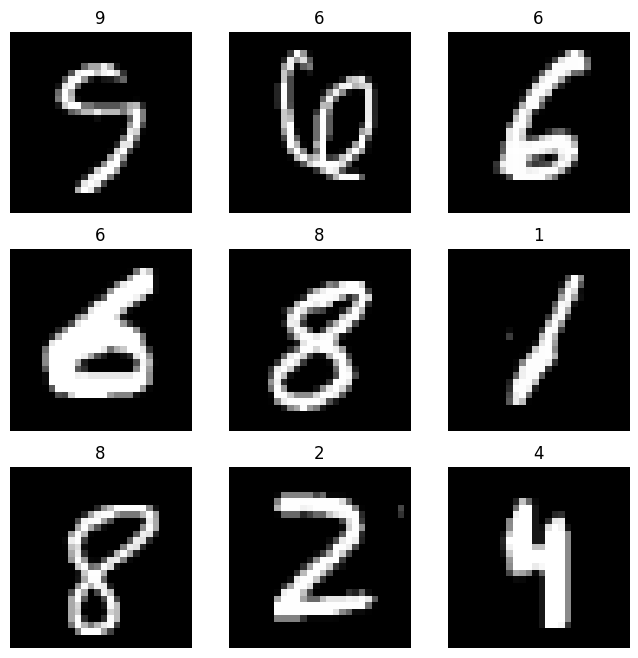

In [ ]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Define labels map
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load QMNIST dataset
train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)

# Create a figure to plot
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# Iterate over the dataset and plot samples
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

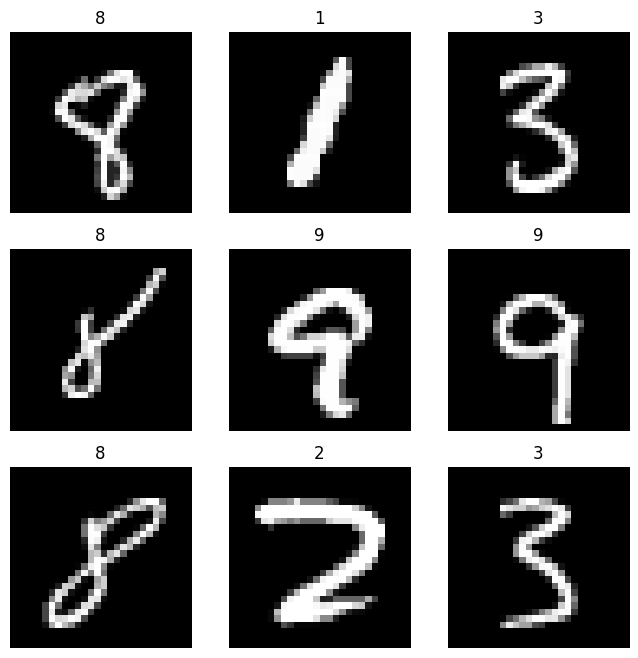

In [ ]:
# Create a figure to plot
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# Iterate over the test dataset and plot samples
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [ ]:
# Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.051395183801651
Epoch 1, Batch 200, Loss: 0.45374462932348253
Epoch 1, Batch 300, Loss: 0.39071386769413946
Epoch 1, Batch 400, Loss: 0.33471844777464865
Epoch 1, Batch 500, Loss: 0.30837334610521794
Epoch 1, Batch 600, Loss: 0.30022230684757234
Epoch 1, Batch 700, Loss: 0.2641004115343094
Epoch 1, Batch 800, Loss: 0.2631072610616684
Epoch 1, Batch 900, Loss: 0.2306192434579134
Epoch 2, Batch 100, Loss: 0.2088735892623663
Epoch 2, Batch 200, Loss: 0.21553051255643368
Epoch 2, Batch 300, Loss: 0.20559132140129804
Epoch 2, Batch 400, Loss: 0.1918110940232873
Epoch 2, Batch 500, Loss: 0.17815559603273867
Epoch 2, Batch 600, Loss: 0.18038600012660028
Epoch 2, Batch 700, Loss: 0.1841022477671504
Epoch 2, Batch 800, Loss: 0.1575042473524809
Epoch 2, Batch 900, Loss: 0.15331582602113486
Epoch 3, Batch 100, Loss: 0.13943775923922658
Epoch 3, Batch 200, Loss: 0.15017410375177861
Epoch 3, Batch 300, Loss: 0.1481042167171836
Epoch 3, Batch 400, Loss: 0.1297552917711436

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on training set: {round(correct / total * 100, 3)}%')

Accuracy on training set: 97.545%


In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: {round(correct / total * 100, 3)}%')

Accuracy on test set: 96.478%


In [ ]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

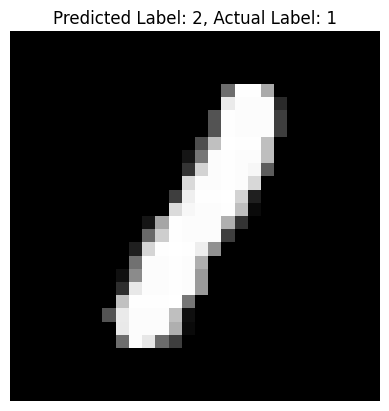

In [ ]:
# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

# Step 3
**Report on the results in terms of prediction accuracy on the train and test datasets:**
- Accuracy on training set: 97.545%
- Accuracy on test set: 96.478%

# Step 4
**Chosen Proposed modification:**
- Increase the current number of nodes in the layer to 256

**Hypothesize how it would change the performance results:**
- Expectation is that the performance would be better. Increasing the number of units should increase the representation power of the model, and thus capture complex relationships between the input features.

# Step 5
Modify the model based on the chosen method and train



In [ ]:
# Define the neural network architecture
class MLP2(nn.Module):
    def __init__(self):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP2()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on test set: {round(correct / total * 100, 3)}%')

Epoch 1, Batch 100, Loss: 0.8071736365556716
Epoch 1, Batch 200, Loss: 0.40492315232753756
Epoch 1, Batch 300, Loss: 0.3472131535410881
Epoch 1, Batch 400, Loss: 0.29048687145113944
Epoch 1, Batch 500, Loss: 0.267886396124959
Epoch 1, Batch 600, Loss: 0.22987685419619083
Epoch 1, Batch 700, Loss: 0.20978261969983578
Epoch 1, Batch 800, Loss: 0.20534527525305749
Epoch 1, Batch 900, Loss: 0.1906840530782938
Epoch 2, Batch 100, Loss: 0.1589204926788807
Epoch 2, Batch 200, Loss: 0.15620957942679525
Epoch 2, Batch 300, Loss: 0.1602341916412115
Epoch 2, Batch 400, Loss: 0.1448148599267006
Epoch 2, Batch 500, Loss: 0.154100420223549
Epoch 2, Batch 600, Loss: 0.13776653269305825
Epoch 2, Batch 700, Loss: 0.12482802143320441
Epoch 2, Batch 800, Loss: 0.13843017285689713
Epoch 2, Batch 900, Loss: 0.13583758232183754
Epoch 3, Batch 100, Loss: 0.10329044912010431
Epoch 3, Batch 200, Loss: 0.12455667938105762
Epoch 3, Batch 300, Loss: 0.10073038604110479
Epoch 3, Batch 400, Loss: 0.1094554986990988

# Step 6
**Report on the results of the modified model and if it matches your hypothesis:**
- Accuracy on training set: 98.033%
- Accuracy on test set: 96.983%

As you can see, the test accuracy is slightly higher (+0.5pp) on this modified model due to the increase in the number of units in the hidden layers.

# Step 7
Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

**I conducted various experiments iteratively, and changed the hyperparamters based on the results of the experiment before.**

## Experiment 1
- Using LeakyRELU as the activation function

In [ ]:
# Define the neural network architecture
class MLP3(nn.Module):
    def __init__(self):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        m = nn.LeakyReLU(0.1)
        x = m(self.fc1(x))
        x = m(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP3()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on test set: {round(correct / total * 100, 3)}%')

Epoch 1, Batch 100, Loss: 0.7568198479712009
Epoch 1, Batch 200, Loss: 0.39976607978343964
Epoch 1, Batch 300, Loss: 0.34245645843446254
Epoch 1, Batch 400, Loss: 0.26382544726133345
Epoch 1, Batch 500, Loss: 0.25990179635584354
Epoch 1, Batch 600, Loss: 0.23463215976953505
Epoch 1, Batch 700, Loss: 0.2089624697342515
Epoch 1, Batch 800, Loss: 0.2059041927754879
Epoch 1, Batch 900, Loss: 0.18694675870239735
Epoch 2, Batch 100, Loss: 0.14455784048885106
Epoch 2, Batch 200, Loss: 0.15795419041067363
Epoch 2, Batch 300, Loss: 0.14165018441155552
Epoch 2, Batch 400, Loss: 0.15178567305207252
Epoch 2, Batch 500, Loss: 0.14831442189402877
Epoch 2, Batch 600, Loss: 0.13280720888637007
Epoch 2, Batch 700, Loss: 0.1156093378085643
Epoch 2, Batch 800, Loss: 0.12313736679032444
Epoch 2, Batch 900, Loss: 0.13748362174257636
Epoch 3, Batch 100, Loss: 0.10562972147017717
Epoch 3, Batch 200, Loss: 0.1169363341666758
Epoch 3, Batch 300, Loss: 0.10485320556908846
Epoch 3, Batch 400, Loss: 0.10145975840

**Experiment 1, Observation: There is a minimal change in model performance.**

## Experiment 2
- Adding dropout
- Using RELU as activation function

In [ ]:
# Define the neural network architecture
class MLP4(nn.Module):
    def __init__(self):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP4()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on test set: {round(correct / total * 100, 3)}%')

Epoch 1, Batch 100, Loss: 1.1522636383771896
Epoch 1, Batch 200, Loss: 0.5623406600952149
Epoch 1, Batch 300, Loss: 0.46236045852303503
Epoch 1, Batch 400, Loss: 0.41659941509366033
Epoch 1, Batch 500, Loss: 0.3889280703663826
Epoch 1, Batch 600, Loss: 0.3597530922293663
Epoch 1, Batch 700, Loss: 0.34314409546554087
Epoch 1, Batch 800, Loss: 0.325596454590559
Epoch 1, Batch 900, Loss: 0.35319829657673835
Epoch 2, Batch 100, Loss: 0.29220532104372976
Epoch 2, Batch 200, Loss: 0.28812515318393705
Epoch 2, Batch 300, Loss: 0.2845014062523842
Epoch 2, Batch 400, Loss: 0.2705543936789036
Epoch 2, Batch 500, Loss: 0.2790458967536688
Epoch 2, Batch 600, Loss: 0.26851860925555227
Epoch 2, Batch 700, Loss: 0.29175366401672365
Epoch 2, Batch 800, Loss: 0.2680337828397751
Epoch 2, Batch 900, Loss: 0.2724119249731302
Epoch 3, Batch 100, Loss: 0.23873983465135099
Epoch 3, Batch 200, Loss: 0.24468070637434722
Epoch 3, Batch 300, Loss: 0.22878408271819353
Epoch 3, Batch 400, Loss: 0.22917100992053746

**Experiment 2, Observation: There is a minimal change in model performance here also (similar to experiment 1).**

## Experiment 2
- Optimizer : SGD with Momentum
- Remove Dropout
- Keep Loss Function as it is. (CrossEntropyLoss is a good loss function for image classification tasks)
- Change epochs to 10

In [ ]:
# Define the neural network architecture
class MLP5(nn.Module):
    def __init__(self):
        super(MLP5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP5()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on test set: {round(correct / total * 100, 3)}%')

Epoch 1, Batch 100, Loss: 2.213886158466339
Epoch 1, Batch 200, Loss: 1.862549875974655
Epoch 1, Batch 300, Loss: 1.2826274049282074
Epoch 1, Batch 400, Loss: 0.8781676918268204
Epoch 1, Batch 500, Loss: 0.6879666876792908
Epoch 1, Batch 600, Loss: 0.5750034096837043
Epoch 1, Batch 700, Loss: 0.5203057399392128
Epoch 1, Batch 800, Loss: 0.47979888543486593
Epoch 1, Batch 900, Loss: 0.453942568898201
Epoch 2, Batch 100, Loss: 0.41257673159241676
Epoch 2, Batch 200, Loss: 0.4241723296046257
Epoch 2, Batch 300, Loss: 0.3782146629691124
Epoch 2, Batch 400, Loss: 0.35747367531061175
Epoch 2, Batch 500, Loss: 0.36062595024704935
Epoch 2, Batch 600, Loss: 0.3587823875248432
Epoch 2, Batch 700, Loss: 0.34613695815205575
Epoch 2, Batch 800, Loss: 0.33072088211774825
Epoch 2, Batch 900, Loss: 0.3385790821909904
Epoch 3, Batch 100, Loss: 0.3370643675327301
Epoch 3, Batch 200, Loss: 0.3387794373929501
Epoch 3, Batch 300, Loss: 0.30916458889842036
Epoch 3, Batch 400, Loss: 0.31826857417821885
Epoch

**Experiment 3, Observation: The model performance is less as seen above, showing us that Adam is much more powerful than SGD with momentum.**

# Step 8
Show an example of a backpropagation algorithm by hand (one round of forward step and backward step on a smaller network by performing derivatives by hand instead of using coding libraries)

- Separate file uploaded for this.